#Introduction

This notebook contains data from Los Angeles Department of Transportation (LADOT) Vision Zero High Injury Network. This dataset includes information on the [LA Geo Hub High Injury Network](https://geohub.lacity.org/datasets/ladot::high-injury-network-2/explore?location=34.019486%2C-118.405852%2C10.81), a series of streets in Los Angeles which account for 70% of deaths and severe injuries for people walking. The data was acquired electroically through the LA Geo Hub website, which provides free public records from a series of public agencies in the City.

#Data Exploration

**Step 1**: Import geopandas module so that I can explore my csv file.

In [5]:
import geopandas as gdp

**Step 2**: Import csv file

In [7]:
highinjurynetwork = gdp.read_file('Data/High_Injury_Network.csv')

In [8]:
type(highinjurynetwork)

geopandas.geodataframe.GeoDataFrame

#Exploring the Data

**Step 3**: I want to explore how my data looks, the command shows me 5 rows of the dataframe

In [9]:
highinjurynetwork.head()

,OBJECTID,STNAME,Shape_Leng,Shape_Le_1,FROM_,TO_,GlobalID,geometry
0,1,CENTURY BLVD,8086.42278037,8086.42278037,VERMONT AVE,AVALON BLVD,bb3983d2-6187-447e-9496-f91f9e1e47dc,None
1,2,FIGUEROA ST,10094.7334563,1.91188133642,COLORADO BLVD,AVENUE 61,acb098aa-5d7d-480f-804f-bb4e3731d37a,None
2,3,103RD ST,5221.4309503,5221.4309503,CENTRAL AVE,GRAPE ST\nGRAPE,b6274f91-d568-49ff-91cf-5ff41e23afa4,None
3,4,MARENGO ST,1031.34609483,1031.34609483,STATE ST,CUMMINGS ST,35ea94e3-3210-4610-bd16-5d6f8e37e7ce,None
4,5,ALAMEDA ST,8611.91103571,8611.91103571,6TH ST,ALPINE ST\nALPINE,c9633073-47a3-4057-8023-c0467de5d6eb,None


The following command shows me what type of data exists in each column of the dataset. This will help me identify how I can use the data. 

In [10]:
highinjurynetwork.dtypes

OBJECTID        object
STNAME          object
Shape_Leng      object
Shape_Le_1      object
FROM_           object
TO_             object
GlobalID        object
geometry      geometry
dtype: object

In [12]:
highinjurynetwork.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    386 non-null    object  
 1   STNAME      386 non-null    object  
 2   Shape_Leng  386 non-null    object  
 3   Shape_Le_1  386 non-null    object  
 4   FROM_       386 non-null    object  
 5   TO_         386 non-null    object  
 6   GlobalID    386 non-null    object  
 7   geometry    0 non-null      geometry
dtypes: geometry(1), object(7)
memory usage: 24.2+ KB


Based on these commands I can tell most of the data are strings, there are 385 entires with 8 colums. This can be an issue because strings can't be quantifyed meaning there are commands that won't work propoerly. For example, if I try plotting my data, it will run the command but it won't have any data to display as seen below:

<AxesSubplot:>

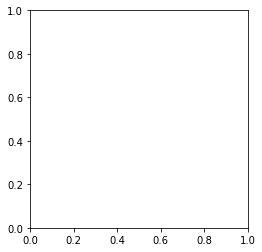

In [11]:
highinjurynetwork.plot()